In [1]:
import numpy as np
import mtd
import pycatch22

from torch.utils.data import DataLoader
from aeon.datasets import load_basic_motions, load_italy_power_demand

import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

In [31]:
!git add persistence\ density\ estimation.ipynb

In [2]:
from aeon.datasets import load_classification

In [3]:
X_train, y_train = load_classification("WormsTwoClass", split = "Train")

X_test, y_test = load_classification("WormsTwoClass", split = "Test")

In [4]:
X_train.shape

(181, 1, 900)

In [5]:
X_test.shape

(77, 1, 900)

In [23]:
from aeon.transformations.collection.feature_based import TSFreshFeatureExtractor
ts_comp = TSFreshFeatureExtractor(
                default_fc_parameters="comprehensive"
) 

In [24]:
res = ts_comp.fit_transform(X_test, y_test)

In [25]:
res.shape

(77, 783)

https://www.timeseriesclassification.com/description.php?Dataset=WormsTwoClass

We have 257 cases, which we split 70\%/30\% into a train and test set. Each series has 900 observations, and each worm is classified as either wild-type or one of four mutant types

In [ ]:
# get the index corresponding to the first pure noise time series
first_idx = np.argmin(y_train)
# get the index corresponding to the first noise + gravitational wave time series
second_idx = np.argmax(y_train)

ts_first = X_train[first_idx]
ts_second = X_train[second_idx]


fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Scatter(x=list(range(len(ts_first[0]))), y=ts_first[0], mode="lines", name="first class"),
    row=1,
    col=1,
)

fig.add_trace(
    go.Scatter(
        x=list(range(len(ts_second[0]))),
        y=ts_second[0],
        mode="lines",
        name="second class",
    ),
    row=1,
    col=2,
)
fig.show()

---
## Let's generate topological features

In [19]:
# from scipy.stats import entropy
# from gtda.time_series import TakensEmbedding
# from sklearn.decomposition import PCA
# import mtd
# from scipy.stats import entropy

# def my_entropy(cross_barcodes, normalize = False):
#     pers_entropy = np.zeros((len(cross_barcodes),2))

#     sum_lifespan = np.zeros(len(cross_barcodes))

    
#     for barcode_idx in range(len(cross_barcodes)):
#         for hom_dim in [0, 1]:
#             lifespan_sums = cross_barcodes[barcode_idx][hom_dim][:, 1] - cross_barcodes[barcode_idx][hom_dim][:, 0]
#             sum_lifespan[barcode_idx] += np.sum(lifespan_sums)

            
#             entropy_dim = entropy(lifespan_sums, base = 2)
            
#             pers_entropy[barcode_idx][hom_dim] = entropy_dim

#     if normalize:
#         pers_entropy /= np.log2(sum_lifespan[...,None])
        
#     return pers_entropy

# embedding_dimension = 100
# embedding_time_delay = 5
# stride = 5

# embedder = TakensEmbedding(time_delay=embedding_time_delay,
#                            dimension=embedding_dimension,
#                            stride=stride)

# batch_pca = PCA(n_components=3)

# persistence = mtd.calc_cross_barcodes 

---

In [20]:
# features_train = np.array(embedder.fit_transform(X_train))

# features_train = [batch_pca.fit_transform(cloud) for cloud in features_train]

In [21]:
# features_test= np.array(embedder.fit_transform(X_test))

# features_test = [batch_pca.fit_transform(cloud) for cloud in features_test]

### Here we can optimise choice of representatives from both class, now I take two random=)

In [22]:
first_represent = features_train[first_idx]
second_represent = features_train[second_idx]

del features_train[first_idx]
del features_train[second_idx-1]

In [23]:
import mtd
from tqdm import tqdm

cross_barcodes = []

for cloud in tqdm(features_train):
    cross_barcodes.append(persistence(first_represent , cloud, batch_size1 = 600, batch_size2 = 600, pdist_device = "cuda", is_plot = False))

entropyes_first = my_entropy(cross_barcodes, normalize=False)
mtd_first = [mtd.get_score(barc, 1, 'sum_length') for barc in cross_barcodes]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 179/179 [00:04<00:00, 37.76it/s]


In [24]:
import mtd
from tqdm import tqdm

cross_barcodes = []

for cloud in tqdm(features_train):
    cross_barcodes.append(persistence(cloud, first_represent, batch_size1 = 600, batch_size2 = 600, pdist_device = "cuda", is_plot = False))

entropyes_first_rw = my_entropy(cross_barcodes, normalize=False)
mtd_first_rw= [mtd.get_score(barc, 1, 'sum_length') for barc in cross_barcodes]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 179/179 [00:03<00:00, 58.38it/s]


In [25]:
import mtd
from tqdm import tqdm

cross_barcodes = []

for cloud in tqdm(features_train):
    cross_barcodes.append(persistence(second_represent , cloud, batch_size1 = 600, batch_size2 = 600, pdist_device = "cuda", is_plot = False))

entropyes_second = my_entropy(cross_barcodes, normalize=False)
mtd_second = [mtd.get_score(barc, 1, 'sum_length') for barc in cross_barcodes]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 179/179 [00:03<00:00, 52.80it/s]


In [26]:
import mtd
from tqdm import tqdm

cross_barcodes = []

for cloud in tqdm(features_train):
    cross_barcodes.append(persistence(cloud, second_represent, batch_size1 = 600, batch_size2 = 600, pdist_device = "cuda", is_plot = False))

entropyes_second_rw = my_entropy(cross_barcodes, normalize=False)
mtd_second_rw= [mtd.get_score(barc, 1, 'sum_length') for barc in cross_barcodes]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 179/179 [00:03<00:00, 59.11it/s]


In [27]:
mtd_first = np.array(mtd_first).reshape(-1,1)
mtd_first_rw = np.array(mtd_first_rw).reshape(-1,1)
mtd_second = np.array(mtd_second).reshape(-1,1)
mtd_second_rw = np.array(mtd_second_rw).reshape(-1,1)

In [28]:
mtds = np.concatenate([mtd_first, mtd_first_rw,
                            mtd_second, mtd_second_rw,
                           ], axis = 1)

In [29]:
entropyes = np.concatenate([entropyes_first, entropyes_first_rw,
                            entropyes_second, entropyes_second_rw
                           ], axis = 1)

In [30]:
entropyes_first_rw.shape

(179, 2)

In [31]:
topological_features_train = np.concatenate([entropyes, mtds],axis = 1)

In [32]:
topological_features_train.shape

(179, 12)

---

In [33]:
import mtd
from tqdm import tqdm

cross_barcodes = []

for cloud in tqdm(features_test):
    cross_barcodes.append(persistence(first_represent , cloud, batch_size1 = 600, batch_size2 = 600, pdist_device = "cuda", is_plot = False))

entropyes_first = my_entropy(cross_barcodes, normalize=False)
mtd_first = [mtd.get_score(barc, 1, 'sum_length') for barc in cross_barcodes]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 77/77 [00:01<00:00, 45.74it/s]


In [34]:
import mtd
from tqdm import tqdm

cross_barcodes = []

for cloud in tqdm(features_test):
    cross_barcodes.append(persistence(cloud, first_represent, batch_size1 = 600, batch_size2 = 600, pdist_device = "cuda", is_plot = False))

entropyes_first_rw = my_entropy(cross_barcodes, normalize=False)
mtd_first_rw= [mtd.get_score(barc, 1, 'sum_length') for barc in cross_barcodes]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 77/77 [00:02<00:00, 36.42it/s]


In [35]:
import mtd
from tqdm import tqdm

cross_barcodes = []

for cloud in tqdm(features_test):
    cross_barcodes.append(persistence(second_represent , cloud, batch_size1 = 600, batch_size2 = 600, pdist_device = "cuda", is_plot = False))

entropyes_second = my_entropy(cross_barcodes, normalize=False)
mtd_second = [mtd.get_score(barc, 1, 'sum_length') for barc in cross_barcodes]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 77/77 [00:02<00:00, 38.35it/s]


In [54]:
import mtd
from tqdm import tqdm

cross_barcodes = []

for cloud in tqdm(features_test):
    cross_barcodes.append(persistence(cloud, second_represent, batch_size1 = 600, batch_size2 = 600, pdist_device = "cuda", is_plot = False))

entropyes_second_rw = my_entropy(cross_barcodes, normalize=False)
mtd_second_rw= [mtd.get_score(barc, 1, 'sum_length') for barc in cross_barcodes]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 77/77 [00:01<00:00, 51.73it/s]


In [57]:
np.array(mtd_second_rw).reshape(-1,1).shape

(77, 1)

In [37]:
mtd_first = np.array(mtd_first).reshape(-1,1)
mtd_first_rw = np.array(mtd_first_rw).reshape(-1,1)
mtd_second = np.array(mtd_second).reshape(-1,1)
mtd_second_rw = np.array(mtd_second_rw).reshape(-1,1)

In [38]:
mtds = np.concatenate([mtd_first, mtd_first_rw,
                            mtd_second, mtd_second_rw,
                           ], axis = 1)

In [39]:
entropyes = np.concatenate([entropyes_first, entropyes_first_rw,
                            entropyes_second, entropyes_second_rw
                           ], axis = 1)

In [40]:
topological_features_test = np.concatenate([entropyes, mtds],axis = 1)
topological_features_test.shape

(77, 12)

---

In [37]:
from Topological_classifier import TopologicalFeatureGenerator
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb

# classificator = xgb.XGBClassifier(n_estimators=2000, max_depth=5, learning_rate=0.1)
classificator = RandomForestClassifier(random_state=42, n_estimators = 1000)


top_gen = TopologicalFeatureGenerator(embedding_dimension = 100,
                                      embedding_time_delay = 5,
                                      stride = 1,
                                      representatives= X_train[[first_idx, second_idx]], search_opt_embd= True)

X_train_new = np.delete(X_train,[first_idx, second_idx], axis = 0)
y_train_new = np.delete(y_train,[first_idx, second_idx], axis = 0).astype(int)

pipe_top = make_pipeline(
    top_gen,
    classificator
)

Optimal time delay based on mutual information: 5
Optimal embedding dimension based on false nearest neighbors: 6


https://www.aeon-toolkit.org/en/stable/getting_started.html#time-series-classification-tsc

In [38]:
from aeon.transformations.collection.feature_based import Catch22
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.metrics import accuracy_score

# X_train_new = np.delete(X_train,[first_idx, second_idx], axis = 0)
# y_train_new = np.delete(y_train,[first_idx, second_idx], axis = 0)
# Create and fit the pipeline

pipe_catch = make_pipeline(
    Catch22(replace_nans=True),
    classificator
)

catch = Catch22(replace_nans=True)

# X_train_catch= catch.fit_transform(X_train_new)

In [39]:
# X_test_catch = catch.transform(X_test)

In [40]:
combined_features = FeatureUnion([("top_gen", top_gen), ("catch", Catch22(replace_nans=True))])

pipe_catch_topgen = make_pipeline(
    combined_features,
    classificator
)

---
#### Catch22 results

In [16]:
# Randomforest = RandomForestClassifier(random_state=42)

In [12]:
pipe_catch.fit(X_train_new,y_train_new-1)
accuracy_score(pipe_catch.predict(X_test), y_test.astype(int)-1)

0.8441558441558441

---
### Topology based features results 

In [13]:
# Randomforest.fit(topological_features_train, y_train_new)
# accuracy_score(Randomforest.predict(topological_features_test), y_test)

In [14]:
pipe_top.fit(X_train_new, y_train_new-1)
accuracy_score(pipe_top.predict(X_test), y_test.astype(int)-1)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.46it/s]


0.7922077922077922

---
### Topology+Catch22 results

In [15]:
# Randomforest.fit(np.concatenate([topological_features_train, X_train_catch], axis = 1), y_train_new)
# accuracy_score(Randomforest.predict(np.concatenate([topological_features_test, X_test_catch], axis = 1)), y_test)

In [17]:
pipe_catch_topgen.fit(X_train_new,y_train_new-1)
accuracy_score(pipe_catch_topgen.predict(X_test), y_test.astype(int)-1)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.03it/s]


0.8831168831168831

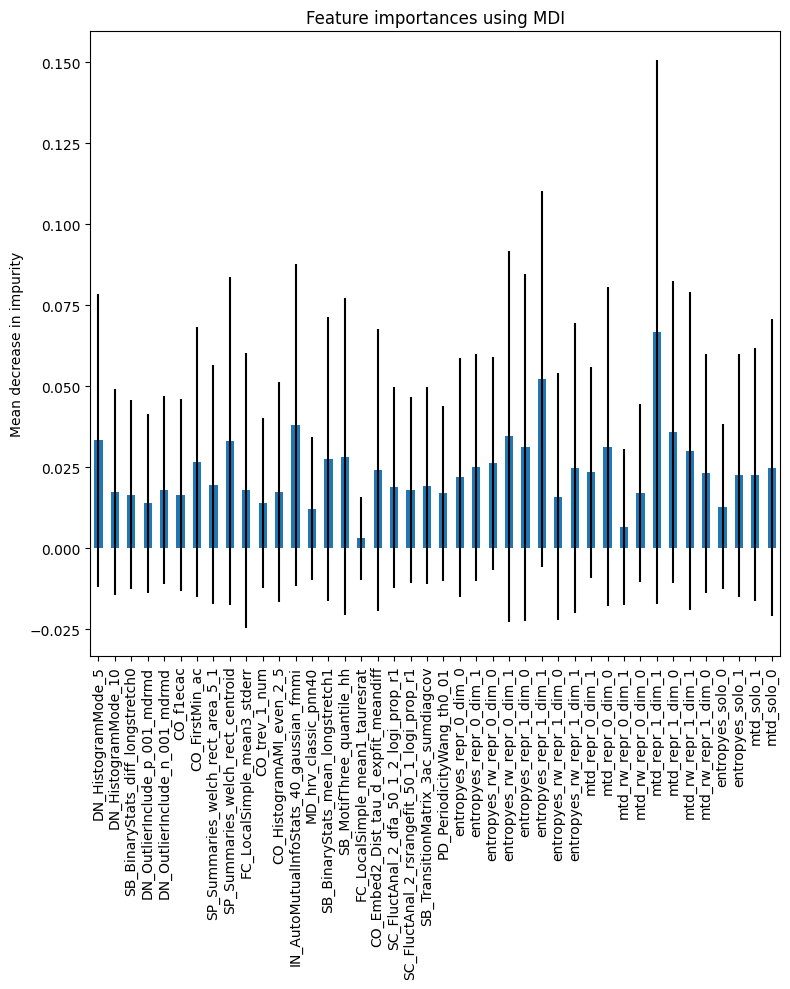

In [18]:
feature_names = catch.get_features_arguments + top_gen.get_feature_names_out(1)

importances = pipe_catch_topgen["randomforestclassifier"].feature_importances_

std = np.std([tree.feature_importances_ for tree in pipe_catch_topgen["randomforestclassifier"].estimators_], axis=0)

import pandas as pd
import matplotlib.pyplot as plt

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize = (8,10))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

---

In [23]:
X_train_new = np.delete(X_train,[first_idx, second_idx], axis = 0)
y_train_new = np.delete(y_train,[first_idx, second_idx], axis = 0).astype(int)

classificator = RandomForestClassifier(random_state=42, n_estimators = 1000)

X_train_comb = combined_features.fit_transform(X_train_new, y_train_new-1)

classificator.fit(X_train_comb, y_train_new-1)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:06<00:00,  1.75s/it]


RandomForestClassifier(n_estimators=1000, random_state=42)

In [24]:
X_test_comb = combined_features.fit_transform(X_test, y_test.astype(int)-1)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.48it/s]


In [25]:
from sklearn.inspection import permutation_importance
import time
start_time = time.time()
result = permutation_importance(
    classificator, X_test_comb,  y_test.astype(int)-1, n_repeats=100, random_state=42, n_jobs=-1
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 44.349 seconds


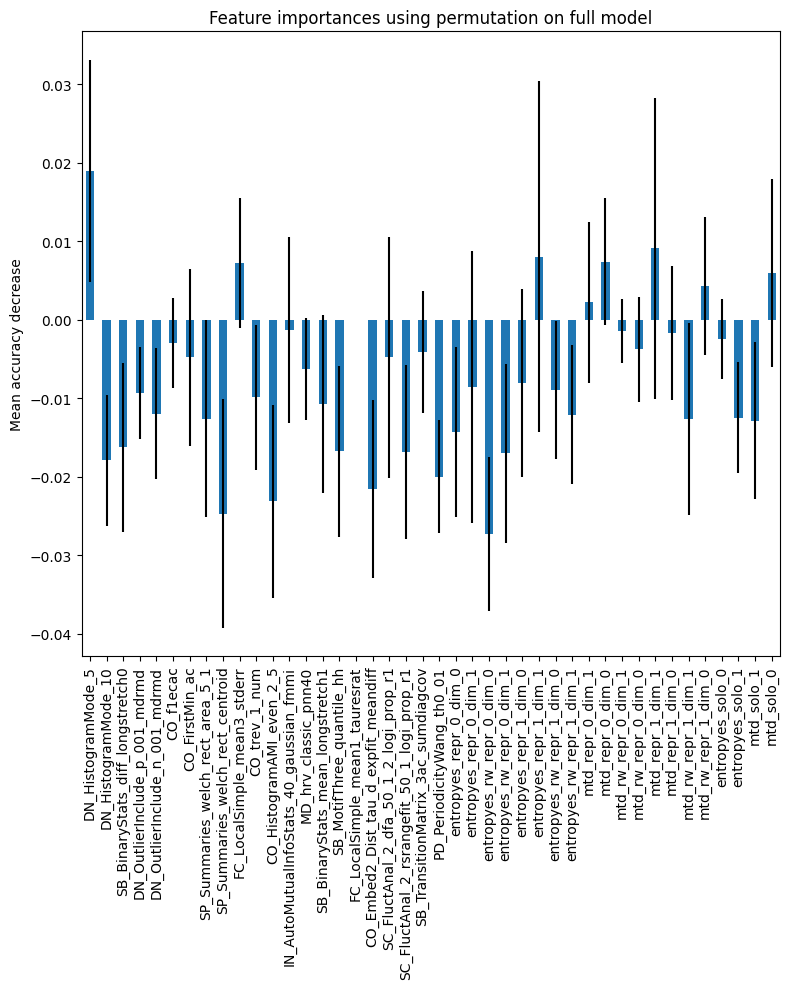

In [26]:
fig, ax = plt.subplots(figsize = (8,10))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

ICML ICLR поискать по tsc взять модель оттуда за бейзлайн

посчитать std 

сделать удобный пайплайн для тестирования на разных датасетх, нужно определиться с базовой моделью и может в качестве топологических фичей добавить просто баркоды и mtd одномерных гомологий

### Let's add four additional datasets for this task and comare results of algorithms

In [18]:
from Topological_classifier import TopologicalFeatureGenerator
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb
from aeon.transformations.collection.feature_based import Catch22
from tsml_eval.experiments import run_classification_experiment
from aeon.classification.sklearn import RotationForestClassifier
from sklearn.model_selection import train_test_split

# dataset = "Computers"
dataset = "Earthquakes"
random_states = [42, 444, 31, 20, 13]

catch_res = []
top_res = []
catch_top_res = []

for random_state in random_states:
    
    X, y = load_classification(dataset)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=random_state)
    
    # get the indexes corresponding to the first appearence of all unique elements
    first_appear = [ np.where(y_train == i)[0][0] for i in np.unique(y_train)]
    
    
    
    # classificator = xgb.XGBClassifier(n_estimators=2000, max_depth=5, learning_rate=0.1)
    classificator = RandomForestClassifier(random_state=random_state, n_estimators = 1000, max_depth = 5)
    # classificator = RotationForestClassifier(n_estimators=1000, random_state=random_state)
    
    top_gen = TopologicalFeatureGenerator(
                        embedding_dimension = 30,
                        embedding_time_delay = 2,
                        stride = 2,
                        n_components = 3,
                        representatives= X_train[first_appear], 
                        search_opt_embd = True,
                        random_state = random_state)
    
    
    combined_features = FeatureUnion([("top_gen", top_gen), ("catch", Catch22(replace_nans=True))])

    pipe_catch_topgen = make_pipeline(
        combined_features,
        classificator
    )
    
    pipe_catch = make_pipeline(
        Catch22(replace_nans=True),
        classificator
    )
    
    pipe_top = make_pipeline(
        top_gen,
        classificator
    )
    
    X_train_new = np.delete(X_train,first_appear, axis = 0)
    y_train_new = np.delete(y_train,first_appear, axis = 0).astype(int)
    
    pipe_catch.fit(X_train_new,y_train_new)
    catch_res.append(accuracy_score(pipe_catch.predict(X_test), y_test.astype(int)))
    
    pipe_top.fit(X_train_new,y_train_new)
    top_res.append(accuracy_score(pipe_top.predict(X_test), y_test.astype(int)))
    
    pipe_catch_topgen.fit(X_train_new,y_train_new)
    catch_top_res.append(accuracy_score(pipe_catch_topgen.predict(X_test), y_test.astype(int)))
    
print(f"Dataset: {dataset}")
print(f"CATCH22 results: {np.round(catch_res, 3)} | {np.mean(catch_res):.3f} +- {np.std(catch_res):.3f}")
print(f"TopGen results: {np.round(top_res, 3)} | {np.mean(top_res):.3f} +- {np.std(top_res):.3f}")
print(f"CATCH22+TopGen results: {np.round(catch_top_res, 3)} | {np.mean(catch_top_res):.3f} +- {np.std(catch_top_res):.3f}")

Optimal time delay based on mutual information: 2
Optimal embedding dimension based on false nearest neighbors: 18
The result shape of cloud: (227, 3)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:58<00:00, 11.66s/it]


Optimal time delay based on mutual information: 1
Optimal embedding dimension based on false nearest neighbors: 12
The result shape of cloud: (227, 3)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:01<00:00, 12.24s/it]


Optimal time delay based on mutual information: 2
Optimal embedding dimension based on false nearest neighbors: 12
The result shape of cloud: (227, 3)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:57<00:00, 11.43s/it]


Optimal time delay based on mutual information: 1
Optimal embedding dimension based on false nearest neighbors: 11
The result shape of cloud: (227, 3)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:05<00:00, 13.00s/it]


Optimal time delay based on mutual information: 2
Optimal embedding dimension based on false nearest neighbors: 15
The result shape of cloud: (227, 3)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:58<00:00, 11.72s/it]


Dataset: Earthquakes
CATCH22 results: [0.784 0.824 0.804 0.804 0.804] | 0.804 +- 0.012
TopGen results: [0.797 0.837 0.837 0.804 0.83 ] | 0.821 +- 0.017
CATCH22+TopGen results: [0.778 0.856 0.83  0.797 0.824] | 0.817 +- 0.027


In [ ]:
CATCH22 results: [0.824 0.77  0.812 0.727 0.794] | 0.785 +- 0.034
TopGen results: [0.667 0.648 0.648 0.685 0.679] | 0.665 +- 0.015
CATCH22+TopGen results: [0.752 0.752 0.776 0.727 0.782] | 0.758 +- 0.020

In [10]:
dataset = "Earthquakes"

X_train, y_train = load_classification(dataset, split = "Train")

X_test, y_test = load_classification(dataset, split = "Test")

# get the index corresponding to the first pure noise time series
first_idx = np.argmin(y_train)
# get the index corresponding to the first noise + gravitational wave time series
second_idx = np.argmax(y_train)



# classificator = xgb.XGBClassifier(n_estimators=2000, max_depth=5, learning_rate=0.1)
classificator = RandomForestClassifier(random_state=42, n_estimators = 1000)

top_gen = TopologicalFeatureGenerator(
                    embedding_dimension = 100,
                    embedding_time_delay = 4,
                    stride = 3,
                    n_components = 10,
                    representatives= X_train[[first_idx, second_idx]])


combined_features = FeatureUnion([("top_gen", top_gen), ("catch", Catch22(replace_nans=True))])

pipe_catch_topgen = make_pipeline(
    combined_features,
    classificator
)

pipe_catch = make_pipeline(
    Catch22(replace_nans=True),
    classificator
)

pipe_top = make_pipeline(
    top_gen,
    classificator
)

X_train_new = np.delete(X_train,[first_idx, second_idx], axis = 0)
y_train_new = np.delete(y_train,[first_idx, second_idx], axis = 0).astype(int)
# The directory to write the results file to

pipe_catch.fit(X_train_new,y_train_new-1)
catch_res = accuracy_score(pipe_catch.predict(X_test), y_test.astype(int)-1)

pipe_top.fit(X_train_new,y_train_new-1)
top_res = accuracy_score(pipe_top.predict(X_test), y_test.astype(int)-1)

pipe_catch_topgen.fit(X_train_new,y_train_new-1)
catch_top_res = accuracy_score(pipe_catch_topgen.predict(X_test), y_test.astype(int)-1)

print(f"Dataset: {dataset}")
print(f"CATCH22 results: {catch_res}")
print(f"TopGen results: {top_res}")
print(f"CATCH22+TopGen results: {catch_top_res}")

Optimal time delay based on mutual information: 1
Optimal embedding dimension based on false nearest neighbors: 15


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:09<00:00,  1.97s/it]


Dataset: Earthquakes
CATCH22 results: 0.7410071942446043
TopGen results: 0.7553956834532374
CATCH22+TopGen results: 0.7482014388489209


In [7]:
dataset = "FordA"

X_train, y_train = load_classification(dataset, split = "Train")

X_test, y_test = load_classification(dataset, split = "Test")

# get the index corresponding to the first pure noise time series
first_idx = np.argmin(y_train)
# get the index corresponding to the first noise + gravitational wave time series
second_idx = np.argmax(y_train)



# classificator = xgb.XGBClassifier(n_estimators=2000, max_depth=5, learning_rate=0.1)
classificator = RandomForestClassifier(random_state=42, n_estimators = 1000)

top_gen = TopologicalFeatureGenerator(
                    embedding_dimension = 100,
                    embedding_time_delay = 4,
                    stride = 5,
                    n_components = 7,
                    representatives= X_train[[first_idx, second_idx]])


combined_features = FeatureUnion([("top_gen", top_gen), ("catch", Catch22(replace_nans=True))])

pipe_catch_topgen = make_pipeline(
    combined_features,
    classificator
)

pipe_catch = make_pipeline(
    Catch22(replace_nans=True),
    classificator
)

pipe_top = make_pipeline(
    top_gen,
    classificator
)

X_train_new = np.delete(X_train,[first_idx, second_idx], axis = 0)
y_train_new = np.delete(y_train,[first_idx, second_idx], axis = 0).astype(int)
# The directory to write the results file to

pipe_catch.fit(X_train_new,y_train_new-1)
catch_res = accuracy_score(pipe_catch.predict(X_test), y_test.astype(int)-1)

pipe_top.fit(X_train_new,y_train_new-1)
top_res = accuracy_score(pipe_top.predict(X_test), y_test.astype(int)-1)

pipe_catch_topgen.fit(X_train_new,y_train_new-1)
catch_top_res = accuracy_score(pipe_catch_topgen.predict(X_test), y_test.astype(int)-1)

print(f"Dataset: {dataset}")
print(f"CATCH22 results: {catch_res}")
print(f"TopGen results: {top_res}")
print(f"CATCH22+TopGen results: {catch_top_res}")

Optimal time delay based on mutual information: 3
Optimal embedding dimension based on false nearest neighbors: 5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:01<00:00, 12.23s/it]


Dataset: FordA
CATCH22 results: 0.9143939393939394
TopGen results: 0.8424242424242424
CATCH22+TopGen results: 0.918939393939394


In [8]:
dataset = "Strawberry"

X_train, y_train = load_classification(dataset, split = "Train")

X_test, y_test = load_classification(dataset, split = "Test")

# get the index corresponding to the first pure noise time series
first_idx = np.argmin(y_train)
# get the index corresponding to the first noise + gravitational wave time series
second_idx = np.argmax(y_train)



# classificator = xgb.XGBClassifier(n_estimators=2000, max_depth=5, learning_rate=0.1)
classificator = RandomForestClassifier(random_state=42, n_estimators = 1000)

top_gen = TopologicalFeatureGenerator(
                    embedding_dimension = 50,
                    embedding_time_delay = 4,
                    stride = 5,
                    n_components = 3,
                    representatives= X_train[[first_idx, second_idx]])


combined_features = FeatureUnion([("top_gen", top_gen), ("catch", Catch22(replace_nans=True))])

pipe_catch_topgen = make_pipeline(
    combined_features,
    classificator
)

pipe_catch = make_pipeline(
    Catch22(replace_nans=True),
    classificator
)

pipe_top = make_pipeline(
    top_gen,
    classificator
)

X_train_new = np.delete(X_train,[first_idx, second_idx], axis = 0)
y_train_new = np.delete(y_train,[first_idx, second_idx], axis = 0).astype(int)
# The directory to write the results file to

pipe_catch.fit(X_train_new,y_train_new-1)
catch_res = accuracy_score(pipe_catch.predict(X_test), y_test.astype(int)-1)

pipe_top.fit(X_train_new,y_train_new-1)
top_res = accuracy_score(pipe_top.predict(X_test), y_test.astype(int)-1)

pipe_catch_topgen.fit(X_train_new,y_train_new-1)
catch_top_res = accuracy_score(pipe_catch_topgen.predict(X_test), y_test.astype(int)-1)

print(f"Dataset: {dataset}")
print(f"CATCH22 results: {catch_res}")
print(f"TopGen results: {top_res}")
print(f"CATCH22+TopGen results: {catch_top_res}")

Optimal time delay based on mutual information: 4
Optimal embedding dimension based on false nearest neighbors: 5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:09<00:00,  2.28s/it]


Dataset: Strawberry
CATCH22 results: 0.9378378378378378
TopGen results: 0.8972972972972973
CATCH22+TopGen results: 0.927027027027027


In [3]:
from Topological_classifier import TopologicalFeatureGenerator
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb
from aeon.transformations.collection.feature_based import Catch22
from tsml_eval.experiments import run_classification_experiment

найти причину перееодических нанов

## Multilabel TSC

In [21]:
dataset = "RefrigerationDevices"

X_train, y_train = load_classification(dataset, split = "Train")

X_test, y_test = load_classification(dataset, split = "Test")

# get the indexes corresponding to the first appearence of all unique elements
first_appear = [ np.where(y_train == i)[0][0] for i in np.unique(y_train)]



# classificator = xgb.XGBClassifier(n_estimators=2000, max_depth=5, learning_rate=0.1)
classificator = RandomForestClassifier(random_state=42, n_estimators = 1000)

top_gen = TopologicalFeatureGenerator(
                    embedding_dimension = 50,
                    embedding_time_delay = 4,
                    stride = 5,
                    n_components = 3,
                    representatives= X_train[first_appear])


combined_features = FeatureUnion([("top_gen", top_gen), ("catch", Catch22(replace_nans=True))])

pipe_catch_topgen = make_pipeline(
    combined_features,
    classificator
)

pipe_catch = make_pipeline(
    Catch22(replace_nans=True),
    classificator
)

pipe_top = make_pipeline(
    top_gen,
    classificator
)

X_train_new = np.delete(X_train, first_appear, axis = 0)
y_train_new = np.delete(y_train, first_appear, axis = 0).astype(int)
# The directory to write the results file to

pipe_catch.fit(X_train_new,y_train_new-1)
catch_res = accuracy_score(pipe_catch.predict(X_test), y_test.astype(int)-1)

pipe_top.fit(X_train_new,y_train_new-1)
top_res = accuracy_score(pipe_top.predict(X_test), y_test.astype(int)-1)

pipe_catch_topgen.fit(X_train_new,y_train_new-1)
catch_top_res = accuracy_score(pipe_catch_topgen.predict(X_test), y_test.astype(int)-1)

print(f"Dataset: {dataset}")
print(f"CATCH22 results: {catch_res}")
print(f"TopGen results: {top_res}")
print(f"CATCH22+TopGen results: {catch_top_res}")

Optimal time delay based on mutual information: 4
Optimal embedding dimension based on false nearest neighbors: 11


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:30<00:00, 12.94s/it]


Dataset: RefrigerationDevices
CATCH22 results: 0.5093333333333333
TopGen results: 0.5253333333333333
CATCH22+TopGen results: 0.5626666666666666


In [22]:
dataset = "StarLightCurves"

X_train, y_train = load_classification(dataset, split = "Train")

X_test, y_test = load_classification(dataset, split = "Test")

# get the indexes corresponding to the first appearence of all unique elements
first_appear = [ np.where(y_train == i)[0][0] for i in np.unique(y_train)]



# classificator = xgb.XGBClassifier(n_estimators=2000, max_depth=5, learning_rate=0.1)
classificator = RandomForestClassifier(random_state=42, n_estimators = 1000)

top_gen = TopologicalFeatureGenerator(
                    embedding_dimension = 50,
                    embedding_time_delay = 4,
                    stride = 5,
                    n_components = 3,
                    representatives= X_train[first_appear])


combined_features = FeatureUnion([("top_gen", top_gen), ("catch", Catch22(replace_nans=True))])

pipe_catch_topgen = make_pipeline(
    combined_features,
    classificator
)

pipe_catch = make_pipeline(
    Catch22(replace_nans=True),
    classificator
)

pipe_top = make_pipeline(
    top_gen,
    classificator
)

X_train_new = np.delete(X_train, first_appear, axis = 0)
y_train_new = np.delete(y_train, first_appear, axis = 0).astype(int)
# The directory to write the results file to

pipe_catch.fit(X_train_new,y_train_new-1)
catch_res = accuracy_score(pipe_catch.predict(X_test), y_test.astype(int)-1)

pipe_top.fit(X_train_new,y_train_new-1)
top_res = accuracy_score(pipe_top.predict(X_test), y_test.astype(int)-1)

pipe_catch_topgen.fit(X_train_new,y_train_new-1)
catch_top_res = accuracy_score(pipe_catch_topgen.predict(X_test), y_test.astype(int)-1)

print(f"Dataset: {dataset}")
print(f"CATCH22 results: {catch_res}")
print(f"TopGen results: {top_res}")
print(f"CATCH22+TopGen results: {catch_top_res}")

Optimal time delay based on mutual information: 4
Optimal embedding dimension based on false nearest neighbors: 3


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [1:27:49<00:00, 752.84s/it]


Dataset: StarLightCurves
CATCH22 results: 0.9698882952889752
TopGen results: 0.9411121903836814
CATCH22+TopGen results: 0.9717095677513355


##  Использование rotation forest

In [ ]:
from Topological_classifier import TopologicalFeatureGenerator
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb
from aeon.transformations.collection.feature_based import Catch22
from tsml_eval.experiments import run_classification_experiment
from aeon.transformations.collection.feature_based import TSFreshFeatureExtractor
from aeon.classification.sklearn import RotationForestClassifier
from aeon.datasets import load_classification
from sklearn.model_selection import train_test_split
from tqdm import tqdm

f = open('out.txt', 'w')

datasets = ["WormsTwoClass", "Computers", "Earthquakes", "FordA", "Strawberry", "RefrigerationDevices", "StarLightCurves", "Worms"]
random_states = [42, 444, 31, 20, 13]
# datasets = ["Computers"]

for dataset in datasets:
    catch_res = []
    top_res = []
    fresh_res = []
    catch_top_res = []
    fresh_top_res = []

    print("------------------------------------------------------", file = f)
    print(f"Dataset: {dataset}", file = f)
    
    for random_state in tqdm(random_states):
        try:
            X, y = load_classification(dataset)

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=random_state)
            
            # get the indexes corresponding to the first appearence of all unique elements
            first_appear = [ np.where(y_train == i)[0][0] for i in np.unique(y_train)]
            
            
            
            # classificator = xgb.XGBClassifier(n_estimators=2000, max_depth=5, learning_rate=0.1)
            classificator = RandomForestClassifier(random_state=random_state, n_estimators = 1000, max_depth = 5)
            # classificator = RotationForestClassifier(n_estimators=1000, random_state=42)
            
            top_gen = TopologicalFeatureGenerator(
                                embedding_dimension = 50,
                                embedding_time_delay = 5,
                                stride = 5,
                                n_components = 10,
                                search_opt_embd = True,
                                representatives = X_train[first_appear],
                                random_state = random_state,
                                verbose = False)
            
            ts_comp = TSFreshFeatureExtractor(
                # default_fc_parameters="comprehensive",
                disable_progressbar=True
            ) 
            
            
            combined_features = FeatureUnion([("top_gen", top_gen), ("catch", Catch22(replace_nans=True))])
            combined_features_2 = FeatureUnion([("top_gen", top_gen), ("catch", ts_comp)])
            
            
            pipe_catch_topgen = make_pipeline(
                combined_features,
                classificator
            )
            
            pipe_fresh_topgen = make_pipeline(
                combined_features_2,
                classificator
            )
            
            pipe_catch = make_pipeline(
                Catch22(replace_nans=True,),
                classificator
            )
            
            pipe_top = make_pipeline(
                top_gen,
                classificator
            )
            
            pipe_fresh = make_pipeline(
                ts_comp,
                classificator
            )
            
            X_train_new = np.delete(X_train, first_appear, axis = 0)
            y_train_new = np.delete(y_train, first_appear, axis = 0).astype(int)
            # The directory to write the results file to
            
            pipe_catch.fit(X_train_new,y_train_new-1)
            catch_res.append(accuracy_score(pipe_catch.predict(X_test), y_test.astype(int)-1))
            
            pipe_top.fit(X_train_new,y_train_new-1)
            top_res.append(accuracy_score(pipe_top.predict(X_test), y_test.astype(int)-1))
            
            pipe_fresh.fit(X_train_new,y_train_new-1)
            fresh_res.append(accuracy_score(pipe_fresh.predict(X_test), y_test.astype(int)-1))
            
            pipe_catch_topgen.fit(X_train_new,y_train_new-1)
            catch_top_res.append(accuracy_score(pipe_catch_topgen.predict(X_test), y_test.astype(int)-1))
            
            pipe_fresh_topgen.fit(X_train_new,y_train_new-1)
            fresh_top_res.append(accuracy_score(pipe_fresh_topgen.predict(X_test), y_test.astype(int)-1))
        except Exception as inst:
            print(inst)
            
    print(f"CATCH22 results: {np.round(catch_res, 3)} | {np.mean(catch_res):.3f} +- {np.std(catch_res):.3f}", file = f)
    print(f"TopGen results: {np.round(top_res, 3)} | {np.mean(top_res):.3f} +- {np.std(top_res):.3f}", file = f)
    print(f"FreshPrice results: {np.round(fresh_res, 3)} | {np.mean(fresh_res):.3f} +- {np.std(fresh_res):.3f}", file = f)
    print(f"CATCH22+TopGen results: {np.round(catch_top_res, 3)} | {np.mean(catch_top_res):.3f} +- {np.std(catch_top_res):.3f}", file = f)
    print(f"Fresh+TopGen results: {np.round(fresh_top_res, 3)} | {np.mean(fresh_top_res):.3f} +- {np.std(fresh_top_res):.3f}", file = f)
f.close()

Dataset: Worms

CATCH22 results: 0.7662337662337663

TopGen results: 0.7012987012987013

FreshPrice results: 0.7792207792207793

CATCH22+TopGen results: 0.7792207792207793

## Let's add Optuna Hyperparameter optimizator for TopGen

In [17]:
from aeon.transformations.collection.feature_based import TSFreshFeatureExtractor
from aeon.classification.sklearn import RotationForestClassifier
import optuna
from sklearn.metrics import accuracy_score
# dataset = "Computers"
dataset = "Earthquakes"

X_train, y_train = load_classification(dataset, split = "Train")

X_test, y_test = load_classification(dataset, split = "Test")

first_appear = [ np.where(y_train == i)[0][0] for i in np.unique(y_train)]

X_train_new = np.delete(X_train, first_appear, axis = 0)
y_train_new = np.delete(y_train, first_appear, axis = 0).astype(int)



classificator = RandomForestClassifier(random_state=random_state, n_estimators = 1000, max_depth = 5)

top_gen = TopologicalFeatureGenerator(
                    embedding_dimension = 100,
                    embedding_time_delay = 5,
                    stride = 3,
                    n_components = 5,
                    search_opt_embd = False,
                    representatives = X_train[first_appear],
                    random_state = 42)

pipe_top = Pipeline(
        steps=[("TopGen", top_gen),
        ("RotForest", classificator)]
    )


param_dist = {"TopGen__embedding_dimension": optuna.distributions.IntDistribution(9, 50),
              "TopGen__embedding_time_delay": optuna.distributions.IntDistribution(1, 5),
              "TopGen__stride": optuna.distributions.IntDistribution(1, 5),
              "TopGen__n_components": optuna.distributions.IntDistribution(3,5)}

opt_top_gen = optuna.integration.OptunaSearchCV(pipe_top, param_dist,
                                            cv = 2, n_trials = 10, scoring = "accuracy", timeout = 600*3)

opt_top_gen.fit(X_train_new,y_train_new-1)

[I 2024-03-25 15:44:56,359] A new study created in memory with name: no-name-f5158802-11e1-454c-9e85-89d3dce5e432


The result shape of cloud: (6, 5)
The result shape of cloud: (6, 5)
The result shape of cloud: (377, 3)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [02:33<00:00, 30.63s/it]


The result shape of cloud: (377, 3)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [02:31<00:00, 30.38s/it]
[I 2024-03-25 15:55:09,578] Trial 0 finished with value: 0.815625 and parameters: {'TopGen__embedding_dimension': 28, 'TopGen__embedding_time_delay': 5, 'TopGen__stride': 1, 'TopGen__n_components': 3}. Best is trial 0 with value: 0.815625.


The result shape of cloud: (6, 5)
The result shape of cloud: (228, 3)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:00<00:00, 12.16s/it]


The result shape of cloud: (228, 3)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:01<00:00, 12.30s/it]
[I 2024-03-25 15:59:18,044] Trial 1 finished with value: 0.825 and parameters: {'TopGen__embedding_dimension': 29, 'TopGen__embedding_time_delay': 2, 'TopGen__stride': 2, 'TopGen__n_components': 3}. Best is trial 1 with value: 0.825.


The result shape of cloud: (6, 5)
The result shape of cloud: (241, 5)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:25<00:00, 17.10s/it]


The result shape of cloud: (241, 5)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:22<00:00, 16.46s/it]
[I 2024-03-25 16:04:55,477] Trial 2 finished with value: 0.815625 and parameters: {'TopGen__embedding_dimension': 16, 'TopGen__embedding_time_delay': 2, 'TopGen__stride': 2, 'TopGen__n_components': 5}. Best is trial 1 with value: 0.825.


The result shape of cloud: (6, 5)
The result shape of cloud: (227, 4)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:02<00:00, 12.44s/it]


The result shape of cloud: (227, 4)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:02<00:00, 12.53s/it]
[I 2024-03-25 16:09:12,464] Trial 3 finished with value: 0.8218749999999999 and parameters: {'TopGen__embedding_dimension': 30, 'TopGen__embedding_time_delay': 2, 'TopGen__stride': 2, 'TopGen__n_components': 4}. Best is trial 1 with value: 0.825.


The result shape of cloud: (6, 5)
The result shape of cloud: (99, 5)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.45s/it]


The result shape of cloud: (99, 5)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.48s/it]
[I 2024-03-25 16:10:27,574] Trial 4 finished with value: 0.809375 and parameters: {'TopGen__embedding_dimension': 44, 'TopGen__embedding_time_delay': 5, 'TopGen__stride': 3, 'TopGen__n_components': 5}. Best is trial 1 with value: 0.825.


The result shape of cloud: (6, 5)
The result shape of cloud: (76, 3)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:12<00:00,  2.50s/it]


The result shape of cloud: (76, 3)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:12<00:00,  2.41s/it]
[I 2024-03-25 16:11:22,057] Trial 5 finished with value: 0.81875 and parameters: {'TopGen__embedding_dimension': 28, 'TopGen__embedding_time_delay': 5, 'TopGen__stride': 5, 'TopGen__n_components': 3}. Best is trial 1 with value: 0.825.


The result shape of cloud: (6, 5)
The result shape of cloud: (76, 4)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:12<00:00,  2.55s/it]


The result shape of cloud: (76, 4)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:12<00:00,  2.51s/it]
[I 2024-03-25 16:12:17,892] Trial 6 finished with value: 0.8218749999999999 and parameters: {'TopGen__embedding_dimension': 28, 'TopGen__embedding_time_delay': 5, 'TopGen__stride': 5, 'TopGen__n_components': 4}. Best is trial 1 with value: 0.825.


The result shape of cloud: (6, 5)
The result shape of cloud: (155, 4)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:41<00:00,  8.21s/it]


The result shape of cloud: (155, 4)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:39<00:00,  7.94s/it]
[I 2024-03-25 16:15:05,718] Trial 7 finished with value: 0.809375 and parameters: {'TopGen__embedding_dimension': 13, 'TopGen__embedding_time_delay': 4, 'TopGen__stride': 3, 'TopGen__n_components': 4}. Best is trial 1 with value: 0.825.


The result shape of cloud: (6, 5)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:04<00:00,  1.09it/s]


OptunaSearchCV(cv=2,
               estimator=Pipeline(steps=[('TopGen',
                                          TopologicalFeatureGenerator(embedding_dimension=100,
                                                                      embedding_time_delay=5,
                                                                      n_components=5,
                                                                      representatives=array([[[ 1.9437326 , -0.35311462, -0.35311462, ..., -0.35311462,
         -0.35311462, -0.35311462]],

       [[-0.51800895, -0.51800895,  2.6542109 , ..., -0.51800895,
          1.4658264 , -0.51800895]]]),
                                                                      search_opt_embd=False,
                                                                      str...
               n_jobs=1,
               param_distributions={'TopGen__embedding_dimension': IntDistribution(high=50, log=False, low=9, step=1),
                                    'TopGen__embedding_time_delay': IntDistribution(high=5, log=False, low=1, step=1),
                                    'TopGen__n_components': IntDistribution(high=5, log=False, low=3, step=1),
                                    'TopGen__stride': IntDistribution(high=5, log=False, low=1, step=1)},
               scoring='accuracy', timeout=1800)

In [5]:
opt_top_gen.best_params_

{'TopGen__embedding_dimension': 64,
 'TopGen__embedding_time_delay': 3,
 'TopGen__stride': 2,
 'TopGen__n_components': 9}

нужно уточнить какк сделть эксперименты более показателььными можетт поменять модель, у котторой важные фичи буду стабильнее. Таккже нужо сделать более серьезный пайплайн для этих же экспериментов.